In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
import requests
import urllib
import os
from PIL import Image
from skimage.filters import threshold_otsu
%matplotlib inline

```
#define DISPLAY_WIDTH   96
#define DISPLAY_HEIGHT  27
#define DISPLAY_SIZE    (DISPLAY_WIDTH * DISPLAY_HEIGHT)

int CartestianToPixelOffset(int x, int y)
{
    return ((y / PANEL_HEIGHT) * BLOCK_SIZE) + ((y % PANEL_HEIGHT) * PANEL_WIDTH) + (((x / PANEL_WIDTH) * PANEL_SIZE) + PANEL_WIDTH - (x % PANEL_WIDTH)) - 1;
}

int CartesianOffsetToPixelOffset(int offset)
{
    int y = offset / DISPLAY_WIDTH;
    int x = offset - (y * DISPLAY_WIDTH);

    y = (DISPLAY_HEIGHT - 1) - y;

    return CartestianToPixelOffset(x, y);
}

...
for (i = 0; i < DISPLAY_SIZE; i++)
  {
      offset = CartesianOffsetToPixelOffset(i);
      SignFrameBuffer[offset / 8] |= (buf[i] ? 1 : 0) << (i % 8);
  }
...
```

In [91]:
DISPLAY_WIDTH = 96
DISPLAY_HEIGHT = 27
DISPLAY_SIZE = (DISPLAY_WIDTH * DISPLAY_HEIGHT)
PANEL_WIDTH = 24
PANEL_HEIGHT = 9
PANEL_SIZE = (PANEL_WIDTH * PANEL_HEIGHT)
BLOCK_SIZE = (DISPLAY_WIDTH * PANEL_HEIGHT)
print(DISPLAY_SIZE,PANEL_SIZE,BLOCK_SIZE)

2592 216 864


In [26]:
out = np.zeros(DISPLAY_SIZE)

In [78]:
def CartesianOffsetToPixelOffset(offset, width, height):
    
    y = offset // width
    #x = offset - (y * width)
    x = offset % width

    y = (height - 1) - y

    return x, y, CartesianToPixelOffset(x, y, PANEL_WIDTH, PANEL_HEIGHT, BLOCK_SIZE)

def CartesianToPixelOffset(x, y, width, height, blocksize):
    size = width * height
    return ((y // height) * blocksize) + ((y % height) * width) + (((x // width) * size) + width - (x % width)) - 1


In [161]:
xaxis = np.arange(0,DISPLAY_SIZE)
out = np.zeros(DISPLAY_SIZE)
xvec = np.zeros(DISPLAY_SIZE)
yvec = np.zeros(DISPLAY_SIZE)
SignFrameBuffer = np.zeros(DISPLAY_SIZE // 8)
SignFrameBuffer.dtype = 'int'
for i in range(DISPLAY_SIZE):
    [xvec[i], yvec[i], out[i]] = CartesianOffsetToPixelOffset(i, DISPLAY_WIDTH, DISPLAY_HEIGHT)
    #SignFrameBuffer[offset / 8] |= (buf[i] ? 1 : 0) << (i % 8)
    j = int(out[i]) // 8
    SignFrameBuffer[j] |= (1 if buf[i] else 0) << (i % 8)

(0, 2592)

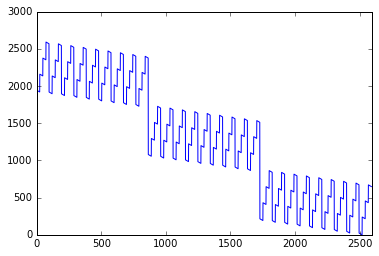

In [80]:
plt.plot(xaxis,out)
plt.xlim(0,DISPLAY_SIZE)
#plt.xlim(0,DISPLAY_SIZE/3)
#plt.ylim(1500,DISPLAY_SIZE)

(0, 2592)

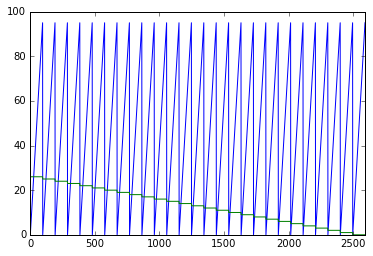

In [81]:
plt.plot(xaxis,xvec, xaxis,yvec)
plt.xlim(0,DISPLAY_SIZE)

In [82]:
print(xvec,yvec)

[  0.   1.   2. ...,  93.  94.  95.] [ 26.  26.  26. ...,   0.   0.   0.]


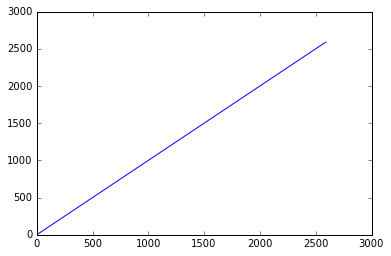

In [83]:
plt.plot(np.sort(out))
# the whole range is covered, in case you weren't sure

In [90]:
out[24]-out[0]

216.0

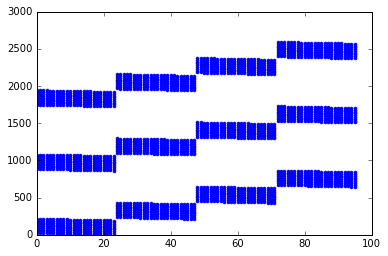

In [97]:
plt.plot(xvec, out,'.')

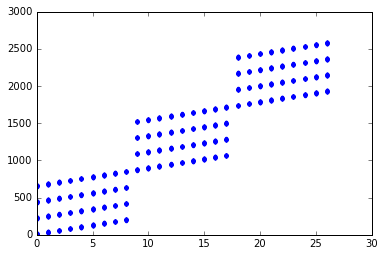

In [96]:
plt.plot(yvec, out,'.')

In [102]:
buf = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

(0, 256)

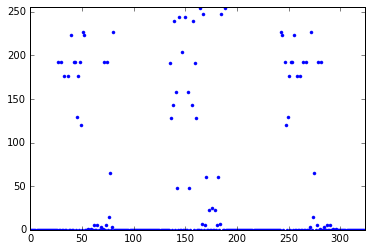

In [155]:
plt.plot(SignFrameBuffer,'.')
plt.xlim(0,SignFrameBuffer.size)
plt.ylim(0,256)

In [140]:
buf2 = np.resize(buf,(27, 96))

In [146]:
#plt.pcolormesh(xvec,yvec,buf2)

In [238]:
#plt.plot(xaxis,out,'.')
#plt.xlim(0,56)
print(buf[40:56])
SignFrameBuffer = np.zeros(DISPLAY_SIZE // 8)
SignFrameBuffer.dtype = 'int'

for i in range(56):
    j = int(out[i]) // 8
    SignFrameBuffer[int(out[i]) // 8] |= (1 if buf[i] else 0) << (i % 8)
    sfb = '{:08b}'.format(SignFrameBuffer[j])
    if i >= 40:
        #print(i,j,bin(SignFrameBuffer[j]))
        print(i,j,sfb)

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
40 267 00000000
41 267 00000000
42 267 00000000
43 267 00000000
44 267 00000000
45 267 00000000
46 267 01000000
47 267 11000000
48 296 00000001
49 296 00000001
50 296 00000001
51 296 00000001
52 296 00000001
53 296 00000001
54 296 00000001
55 296 00000001


In [204]:
jvec = out // 8